# Interactive optimization

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import ipywidgets as ipw
from matplotlib import cm

In [13]:
def cost(p):
    global counterCostCall
    """
    Himmelblau cost function.
    https://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    
    x, y = p 
    counterCostCall += 1
    return (x**2 + y -11)**2 + (x + y**2 -7)**2


Nx, Ny = 100, 100
x = np.linspace(-5., 5., Nx)
y = np.linspace(-5., 5., Ny)
X, Y = np.meshgrid(x, y)
zf = np.array([X.flatten(), Y.flatten()])
Z = cost(zf).reshape(Nx, Ny)
Z = np.where(Z > 200., np.nan, Z)

<IPython.core.display.Javascript object>


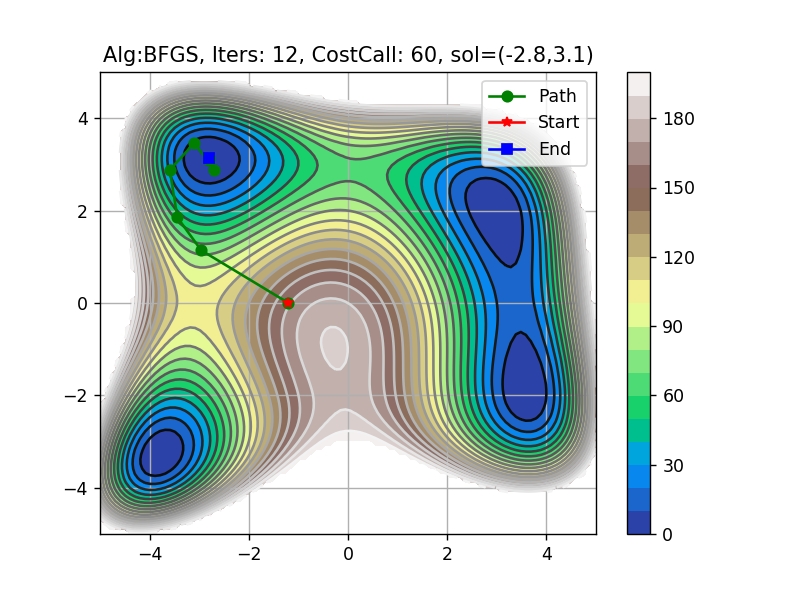

interactive(children=(FloatSlider(value=0.0, description='x0', max=4.0, min=-4.0), FloatSlider(value=0.0, desc…

In [16]:
counter = 1
counterCostCall = 0
P = np.zeros((1000, 2)) 
P[0] = -1., 0.
def track(xk):
    global counter, P
    P[counter, :] = xk
    counter +=1



plt.figure()
title = plt.title("")
plt.contourf(X, Y, Z, 20, cmap = cm.terrain)
plt.colorbar()
plt.contour(X, Y, Z, 20, cmap = cm.gray)
line, = plt.plot(P[:, 0], P[:, 1], "og-", label = "Path")
line0, = plt.plot(P[:1, 0], P[:1, 1], "r*-", label = "Start")
line1, = plt.plot(P[counter-1:counter, 0], P[counter-1:counter, 1], "bs-", label = "End")
plt.grid()
plt.legend()

@ipw.interact(x0=(-4.,4, .1), 
              y0=(-4.,4, .1), 
              algorithm = ["Nelder-Mead", "BFGS", "Powell"])
def run_optimization(x0 = 0., y0 = 0., algorithm = "Nelder-Mead"):
    global P, counter, counterCostCall
    counter = 1
    counterCostCall = 0 
    P *= np.nan
    P[0] = x0, y0
    sol = optimize.minimize(cost, [x0, y0], callback = track, method = algorithm)
    line.set_xdata(P[:, 0])
    line.set_ydata(P[:, 1])
    line0.set_xdata(P[:1, 0])
    line0.set_ydata(P[:1, 1])
    line1.set_xdata(P[counter-1:counter, 0])
    line1.set_ydata(P[counter-1:counter, 1])
    title.set_text("Alg:{0}, Iters: {1}, CostCall: {4}, sol=({2:.1f},{3:.1f})".format(algorithm, counter, sol.x[0], sol.x[1], counterCostCall) )
